In [3]:
import pandas as pd

df = pd.read_csv('insurance.csv')

print("Dataset loaded successfully!")
print(df.head())

Dataset loaded successfully!
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


First 5 rows of dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Summary Statistics:
               age          bm

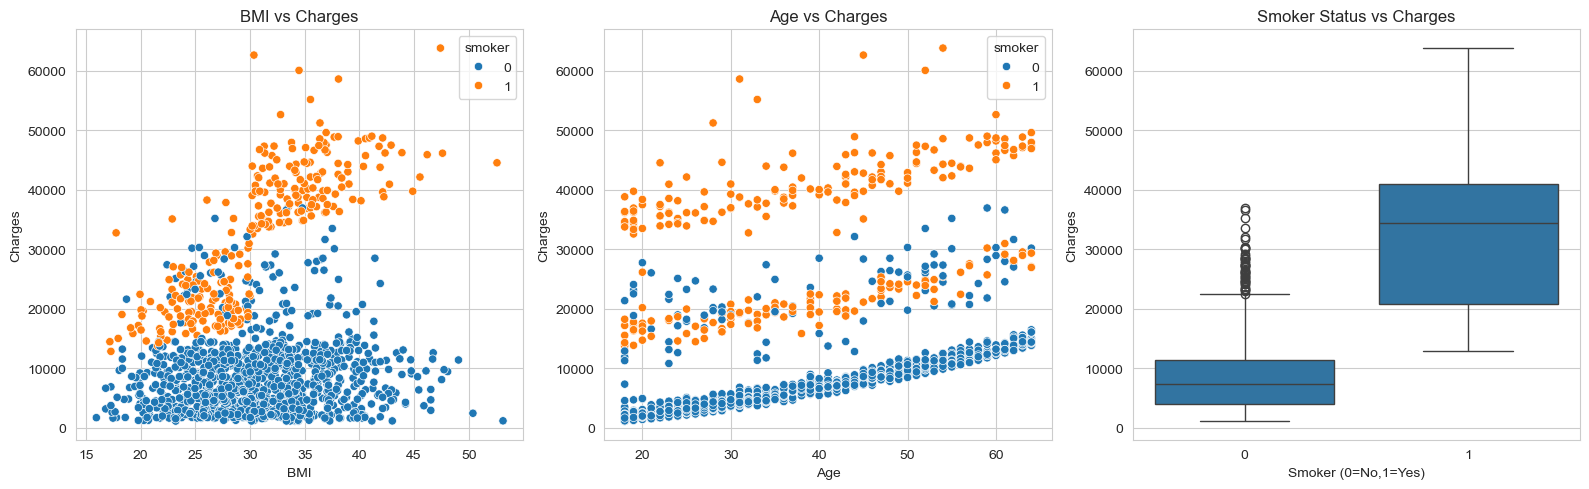

In [4]:

# Task 4: Predicting Insurance Claim Amounts


# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

sns.set_style("whitegrid")

# Load Dataset
data = pd.read_csv("insurance.csv")  # Make sure file is in same folder
print("First 5 rows of dataset:")
print(data.head())

# Explore Dataset
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

#  Encode categorical variables
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])  # male/female
data['smoker'] = le.fit_transform(data['smoker'])  # yes/no
data['region'] = le.fit_transform(data['region'])  # region categories

# Split Features and Target
X = data.drop('charges', axis=1)
y = data['charges']

# Optional: Scale features (not strictly needed for Linear Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6️Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 7️⃣ Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 8️⃣ Make Predictions
y_pred = model.predict(X_test)

# 9️⃣ Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# 10️⃣ Feature Impact Visualization
plt.figure(figsize=(16,5))

# BMI vs Charges
plt.subplot(1,3,1)
sns.scatterplot(x=data['bmi'], y=data['charges'], hue=data['smoker'])
plt.title("BMI vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")

# Age vs Charges
plt.subplot(1,3,2)
sns.scatterplot(x=data['age'], y=data['charges'], hue=data['smoker'])
plt.title("Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")

# Smoker Status vs Charges
plt.subplot(1,3,3)
sns.boxplot(x='smoker', y='charges', data=data)
plt.title("Smoker Status vs Charges")
plt.xlabel("Smoker (0=No,1=Yes)")
plt.ylabel("Charges")

plt.tight_layout()
plt.show()